# 타고 홈페이지에서 인기차종(판매대수 데이터프레임 : pop_car_df)

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings

from urllib.request import urlopen
from bs4 import BeautifulSoup as soup
from collections import Counter

warnings.filterwarnings(action='ignore')
plt.rcParams['font.family']='Gulim'

In [5]:
target="https://tago.kr/model/order.htm" # 차량 인기순위 파악 주소 
html = urlopen(target)
bs = soup(html.read(),'html.parser')

list_cars = bs.find_all('table')

j=0

pop_car_df=pd.DataFrame()

for list_car in list_cars:
    j=j+1
    for i in list_car.find_all('tr')[1:]:
        year = bs.find_all('h5',attrs={"class":"h5-tit"})
        year_num=(year[j-1].get_text()[0:4]) #year
        car_name=(i.find_all('td')[1].text) #차종
        amount=(i.find_all('td')[2].text) #판매량 
        pop_car_df = pd.concat([pop_car_df,pd.DataFrame({"Car_name":[car_name],"판매량":[amount],"Year":[year_num]})])
        
#year_nums.append(year[j-1].get_text()[0:4])#year
#car_names.append(i.find_all('td')[1].text) #차종
#amounts.append(i.find_all('td')[2].text) #판매량
        
       
pop_car_df=pop_car_df.reset_index()
pop_car_df = pop_car_df[['Year','Car_name','판매량']]# 데이터 프레임 열 순서 변경 

In [6]:
pop_car_df

,Year,Car_name,판매량
0,2022,현대 아이오닉5,"27,399"
1,2022,기아 EV6,"24,852"
2,2022,현대 포터2 일렉트릭,"20,272"
3,2022,기아 봉고3 EV,"12,719"
4,2022,현대 아이오닉6,"11,289"
5,2022,현대 넥쏘,"10,164"
6,2022,니로 EV,"7,454"
7,2022,테슬라 모델3,"7,323"
8,2022,테슬라 모델Y,"7,248"
9,2022,제네시스 GV60,"5,639"


# [ 차량등록 데이터 프레임 area_cars ]

In [7]:
temp1 = pd.read_csv("C:/work/자동차등록현황보고_이륜차신고현황 시도별 (2020).csv",encoding='EUC-KR')
temp2 = pd.read_csv("C:/work/자동차등록현황보고_이륜차신고현황 시도별 (2021).csv",encoding='EUC-KR')
temp3 = pd.read_csv("C:/work/자동차등록현황보고_이륜차신고현황 시도별 (2022).csv",encoding='EUC-KR')

#0번째 행에 인덱스가 값으로 들어가서 행 삭제 
temp1=temp1.drop([0]) 
temp2=temp2.drop([0])
temp3=temp3.drop([0])

area_cars = pd.concat([temp1,temp2,temp3])
area_cars=area_cars.loc[:,'월(Monthly)':'계'] # 월부터 계까지만 데이터 프레임에 저장 
area_cars=area_cars[area_cars['시군구'] =='계'] #시군구가 '계'인 항목만 데이터 프레임에 남김
area_cars=area_cars.reset_index() #수정된 데이터 프레임에 새로운 인덱스값 설정


area_cars=area_cars.drop(['index','시군구'],axis=1) #리셋된 area_cars에서 기존에 사용하던 index 와 시군구 행 삭제 

# 월 (Monthly) 행을 연도만 나오게 하겠음 
area_cars['date']=area_cars['월(Monthly)'].apply(lambda x : pd.to_datetime(str(x),format='%Y-%m'))
area_cars['Year']=area_cars['date'].dt.strftime('%Y')


area_cars=area_cars.drop(['월(Monthly)','date'],axis=1) # 월(Monthly)와 year 를 뽑아내기 위해 사용한 date 삭제 
area_cars = area_cars[['Year','시도명','계']]  # 데이터 프레임 열 순서 변경 
area_cars = area_cars.rename(columns={'계':'등록대수'}) # 데이터 명 변경 

In [30]:
area_cars

,Year,시도명,등록대수
0,2020,서울,459002
1,2020,부산,136158
2,2020,대구,137000
3,2020,인천,79420
4,2020,광주,40782
5,2020,대전,39242
6,2020,울산,64499
7,2020,세종,11667
8,2020,경기,417370
9,2020,강원,66937


In [28]:
#시각화 (그래프) 를 위한 데이터 프레임 입니다. 
year_area_cars=pd.DataFrame()

temp4 = temp1
temp5 = temp2
temp6 = temp3


temp4 = temp4.loc[:,'시도명':'계']
temp5 = temp5.loc[:,'시도명':'계']
temp6 = temp6.loc[:,'시도명':'계']

temp4=temp4[temp4['시군구'] =='계']
temp5=temp5[temp5['시군구'] =='계']
temp6=temp6[temp6['시군구'] =='계']

temp4=temp4.rename(columns={'계':'2020년 등록대수'})
temp5=temp5.rename(columns={'계':'2021년 등록대수'})
temp6=temp6.rename(columns={'계':'2022년 등록대수'})

temp4=temp4.reset_index()
temp5=temp5.reset_index()
temp6=temp6.reset_index()

temp4=temp4.drop(['index','시군구'],axis=1)
temp5=temp5.drop(['index','시군구','시도명'],axis=1)
temp6=temp6.drop(['index','시군구','시도명'],axis=1)

year_area_cars= pd.concat([temp4,temp5,temp6],axis=1)


In [29]:
year_area_cars

,시도명,2020년 등록대수,2021년 등록대수,2022년 등록대수
0,서울,459002,433020,420357
1,부산,136158,131423,133074
2,대구,137000,135919,120740
3,인천,79420,81029,81414
4,광주,40782,38473,36118
5,대전,39242,39691,40236
6,울산,64499,62533,63330
7,세종,11667,10695,11312
8,경기,417370,420200,427543
9,강원,66937,62487,62757


In [40]:
popular_df = pd.read_csv('popular.csv')
popular_df

,차종,광역시/도,연도,국고보조금,지방비보조금,보조금합계,예상구매가
0,EVKMC 마사다 2밴 (EVKMC Masada 2 van),강원,2020,680.0,360.0,1040.0,4895.0
1,EVKMC 마사다 2밴 (EVKMC Masada 2 van),강원,2021,680.0,360.0,1040.0,4895.0
2,EVKMC 마사다 2밴 (EVKMC Masada 2 van),강원,2022,680.0,360.0,1040.0,4895.0
3,EVKMC 마사다 2밴 (EVKMC Masada 2 van),강원,2023,680.0,360.0,1040.0,4895.0
4,EVKMC 마사다 2밴 (EVKMC Masada 2 van),경기,2020,680.0,367.7,1047.7,4887.3
...,...,...,...,...,...,...,...
5095,현대 포터2 일렉트릭 (Porter II Electric),충남,2023,680.0,700.0,1380.0,4555.0
5096,현대 포터2 일렉트릭 (Porter II Electric),충북,2020,680.0,680.0,1360.0,4575.0
5097,현대 포터2 일렉트릭 (Porter II Electric),충북,2021,680.0,680.0,1360.0,4575.0
5098,현대 포터2 일렉트릭 (Porter II Electric),충북,2022,680.0,680.0,1360.0,4575.0


# 시각화 

아나콘다 프롬프트에서 

pip install geopandas 해주셔야 아래 geopandas 가 import 됩니다.

In [44]:
import geopandas as gpd 

In [45]:

kr_sido_2 = gpd.read_file("C:/work/TL_SCCO_CTPRVN", encoding="cp949") ## 원본 shape 파일의 한글코드: cp949 (not utf8)
kr_sido_2.rename(columns={"CTP_KOR_NM":"location"},inplace=True)
kr_sido_2.drop(columns={"CTPRVN_CD","CTP_ENG_NM"},inplace=True)
kr_sido_2=pd.concat([kr_sido_2,year_area_cars],axis=1)
kr_sido_2.drop(columns={"시도명"},inplace=True)
kr_sido_2

,location,geometry,2020년 등록대수,2021년 등록대수,2022년 등록대수
0,서울특별시,"POLYGON ((966987.226 1941110.946, 961574.146 1...",459002,433020,420357
1,부산광역시,"MULTIPOLYGON (((1138209.365 1673609.179, 11381...",136158,131423,133074
2,대구광역시,"POLYGON ((1107819.047 1781088.551, 1112278.678...",137000,135919,120740
3,인천광역시,"MULTIPOLYGON (((909743.413 1946023.117, 909736...",79420,81029,81414
4,광주광역시,"POLYGON ((932712.687 1696168.692, 935873.826 1...",40782,38473,36118
5,대전광역시,"POLYGON ((990703.983 1832673.400, 990974.727 1...",39242,39691,40236
6,울산광역시,"MULTIPOLYGON (((1167949.952 1710285.043, 11679...",64499,62533,63330
7,세종특별자치시,"POLYGON ((971235.936 1844386.985, 969224.585 1...",11667,10695,11312
8,경기도,"MULTIPOLYGON (((931607.470 1894480.382, 931653...",417370,420200,427543
9,강원도,"MULTIPOLYGON (((1165648.417 1909008.805, 11656...",66937,62487,62757


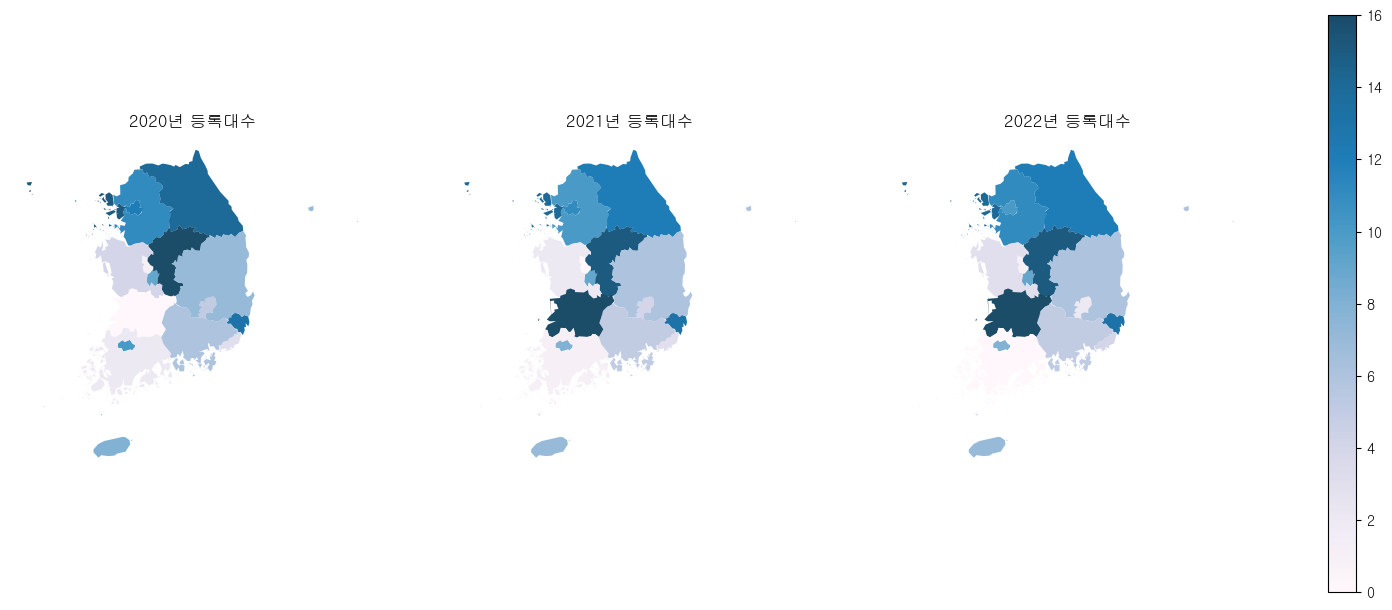

In [46]:
fig,ax = plt.subplots(ncols=3,sharey=True,figsize=(20,15))

kr_sido_2.plot(ax=ax[0],column="2020년 등록대수",cmap="PuBu",legend=False, alpha=0.9)
kr_sido_2.plot(ax=ax[1],column="2021년 등록대수",cmap="PuBu",legend=False, alpha=0.9)
kr_sido_2.plot(ax=ax[2],column="2022년 등록대수",cmap="PuBu",legend=False, alpha=0.9)

ax[0].set_title('2020년 등록대수')
ax[1].set_title('2021년 등록대수')
ax[2].set_title('2022년 등록대수')

patch_col = ax[0].collections[0]
cb = fig.colorbar(patch_col, ax=ax, shrink=0.5)

ax[0].set_axis_off();
ax[1].set_axis_off();
ax[2].set_axis_off();